In [1]:
import keras
from keras import layers

In [2]:
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is


In [3]:
input_img = keras.Input(shape=(784,))


In [4]:
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)


In [5]:
decoded = layers.Dense(784, activation='sigmoid')(encoded)


In [6]:
autoencoder = keras.Model(input_img, decoded)


In [7]:
encoder = keras.Model(input_img, encoded)


In [8]:

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [9]:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [10]:

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


In [11]:

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [12]:

autoencoder.fit(x_train, x_train,
 epochs=10,
 batch_size=256,
 shuffle=True,
 validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 6s 17ms/step - loss: 0.2768 - val_loss: 0.1926
Epoch 2/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1729 - val_loss: 0.1549
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1439 - val_loss: 0.1323
Epoch 4/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1272 - val_loss: 0.1199
Epoch 5/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1170 - val_loss: 0.1117
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1099 - val_loss: 0.1057
Epoch 7/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1048 - val_loss: 0.1015
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1012 - val_loss: 0.0985
Epoch 9/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0987 - val_loss: 0.0964
Epoch 10/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0970 - val_lo

In [13]:

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


313/313 [==============================] - 2s 4ms/step


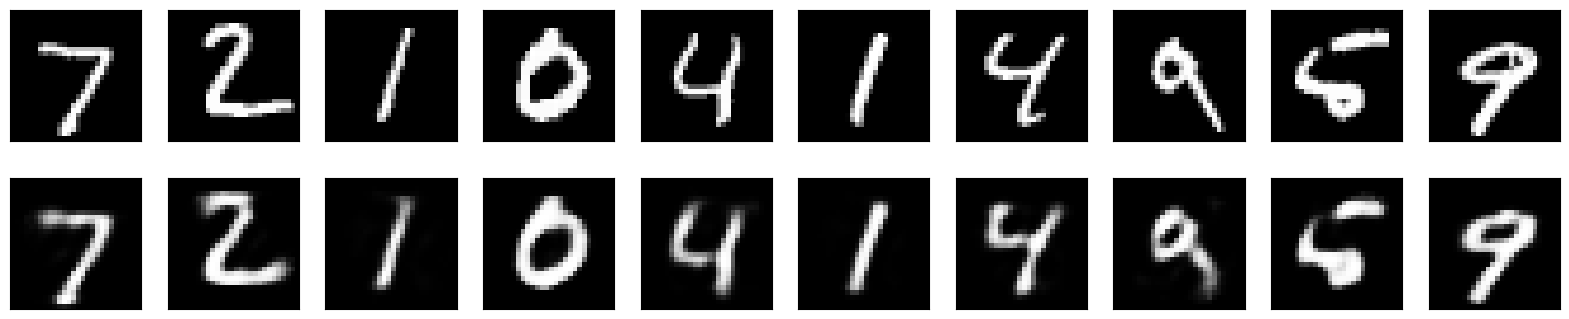

In [14]:
import matplotlib.pyplot as plt
n = 10 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
 # Display original
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # Display reconstruction
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()